In [3]:
from pymongo import MongoClient
import pandas as pd
import numpy as np

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from string import punctuation
from collections import Counter
from textblob import TextBlob
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, cosine_similarity
import nltk
from nltk.tag import pos_tag
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans, MiniBatchKMeans


from collections import OrderedDict
import re
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [3]:
import pickle
from nltk.sentiment import SentimentAnalyzer
from copy import deepcopy
from nltk.stem import *

/home/ubuntu/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
import sys
import json
import matplotlib.pyplot as plt
from bqplot import pyplot as plt2

In [6]:
import gensim
from gensim.models import *
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
from sklearn import metrics
import pickle

In [6]:
# #additional nltk downloads needed
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

In [7]:
mng_client = MongoClient()
mng_db = mng_client['news_db']
news_collection = mng_db.news_collection


In [2]:
#collection_name = 'news_collection'

In [12]:
#Top line adds a collection to the database. Bottom line removes a collection.
#mng_db.create_collection(collection_name)
#mng_db.drop_collection('news_collection')

In [1]:
#mng_db.collection_names()

In [9]:
news_collection = mng_db.news_collection

In [107]:
data = pd.read_csv('/home/ubuntu/news_files/all-the-news/articles1.csv')
data2 = pd.read_csv('/home/ubuntu/news_files/all-the-news/articles2.csv')
data3 = pd.read_csv('/home/ubuntu/news_files/all-the-news/articles3.csv')

In [108]:
data.drop(['Unnamed: 0'],1, inplace=True)
data2.drop(['Unnamed: 0'],1, inplace=True)
data3.drop(['Unnamed: 0'],1, inplace=True)

In [109]:
data_json = json.loads(data.to_json(orient='records'))
data2_json = json.loads(data2.to_json(orient='records'))
data3_json = json.loads(data3.to_json(orient='records'))

In [99]:
def insert_record(data):
    for item in data:
        news_collection.insert_one(item)

In [110]:
insert_record(data_json)

In [111]:
insert_record(data2_json)

In [112]:
insert_record(data3_json)

In [9]:
news_collection.count()

142570

In [119]:
#This command shows the next item in the data2_json that meets the conditions
#next((item for item in data2_json if item['publication'] =='NPR'))

In [79]:
#This shows the number of items in the list that meet the conditions. learning about generator objects
#len(list(item for item in data2_json if item['publication'] =='Buzzfeed News'))

0

In [271]:
#news_collection.find_one({'year':2016.0, 'publication':'NPR'})

In [ ]:
# #this works as a mongo call to create a dataframe of just NYTimes articles.
# nyt_year_2017 = []
# cursor = news_collection.find({'year':2017.0, 'publication':'New York Times'})
# for document in cursor:
#     nyt_year_2017.append(document)

In [181]:
year_2017 = []
cursor = news_collection.find({'year':2017.0})
for document in cursor:
    year_2017.append(document)

In [53]:
#nytdf = pd.DataFrame(nyt_year_2017)

In [10]:
year_2016 = []
cursor = news_collection.find({'year':2016.0})
for document in cursor:
    year_2016.append(document)

In [11]:
df = pd.DataFrame(year_2016)

In [12]:
len(df)

85405

In [9]:
df_nyt = df[df['publication'] == 'New York Times']

In [10]:
df_reu = df[df['publication'] == 'Reuters']
df_npr = df[df['publication'] == 'NPR']

In [13]:
df.publication.value_counts()

Breitbart              16100
New York Post           8985
NPR                     7647
Washington Post         7234
Reuters                 6165
Atlantic                5150
Business Insider        4596
Fox News                4322
Guardian                4284
National Review         4190
CNN                     4104
New York Times          3628
Vox                     3257
Buzzfeed News           3254
Talking Points Memo     2489
Name: publication, dtype: int64

In [20]:
stop = stopwords.words('english')
stop.append("new")
stop+=['?','!','.',',',':',';']
stop.append("like")
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('mr.')
stop.append('mr')
stop.append('ms')
stop.append('ms.')
stop.append('mrs')
stop = set(stop)

In [14]:
def get_stopwords():    
    #Create a set of stop words to pull out of the dataset
    stop = stopwords.words('english')
    stop+=['?','!','.',',',':',';']
    stop.append("new")
    stop.append("like")
    stop.append("u")
    stop.append("it'")
    stop.append("'s")
    stop.append("n't")
    stop.append('mr.')
    stop.append('mr')
    stop.append('ms')
    stop.append('ms.')
    stop.append('mrs')
    stop = set(stop)
    return (stop)

In [15]:
stemmer = SnowballStemmer('english')

In [ ]:
df_clean = clean_data(df)

In [257]:
df_trump = df[df['content'].str.contains("Trump")].copy(deep=True)

In [432]:
len(df)

50404

In [433]:
len(df_russia), len(df_police)

(7439, 6625)

In [258]:
df_russia = df[df['content'].str.contains("Russia")].copy(deep=True)
df_police = df[df['content'].str.contains('police')].copy(deep=True)

In [259]:
len(df_police[df_police['content'].str.contains('Russia')])

629

In [261]:
len(df_russia[df_russia['content'].str.contains('police')])

629

In [262]:
len(df_russia), len(df_police)

(7439, 6625)

In [263]:
df_russia.publication.value_counts()

Reuters                1015
Washington Post         932
Breitbart               867
CNN                     782
New York Times          630
Guardian                618
New York Post           476
NPR                     447
Atlantic                439
National Review         412
Business Insider        370
Vox                     247
Buzzfeed News           193
Talking Points Memo      11
Name: publication, dtype: int64

In [264]:
df_police.publication.value_counts()

New York Post          1030
Breitbart               928
New York Times          738
Guardian                736
Reuters                 731
CNN                     652
Washington Post         490
NPR                     454
Buzzfeed News           210
Atlantic                196
National Review         195
Vox                     153
Business Insider        106
Talking Points Memo       6
Name: publication, dtype: int64

In [18]:
df_trump.publication.value_counts()

Breitbart              4160
Washington Post        2778
Reuters                2482
CNN                    2128
New York Times         1844
Guardian               1808
New York Post          1637
NPR                    1548
Atlantic               1261
National Review        1188
Vox                    1110
Business Insider       1028
Buzzfeed News           747
Talking Points Memo      48
Name: publication, dtype: int64

In [16]:
def clean_data(df):
    stop = get_stopwords()
    stemmer = SnowballStemmer('english')
    df['text_clean'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    df['text_clean_stem'] = df['text_clean'].apply(stemmer.stem)
    df['sentences'] = df.text_clean_stem.apply(sent_tokenize)
    df['sent_length'] = df.apply(lambda row: len(row['sentences']),axis=1)
    df['words'] = df.text_clean_stem.apply(word_tokenize)
    df['word_pos'] = df.text_clean_stem.apply(word_tokenize).apply(pos_tag)
    return df

In [266]:
df_police = clean_data(df_police)
df_russia = clean_data(df_russia)

In [20]:
df_trump = clean_data(df_trump)

In [12]:
#df_trump.to_pickle('trump_df.pkl')
df_trump = pd.read_pickle('trump_df.pkl')

In [13]:
len(df_trump)

23767

In [47]:
df_trump['sent_length'].idxmin()

8549

In [43]:
short_article =  df_trump.iloc[8549]['text_clean_stem']

In [118]:
#short_article

In [37]:
#This is the longest article in the dataset, was wondering what the text was
long_article = df_trump[df_trump['sent_length'] == 2888]['text_clean_stem']

In [119]:
#long_article[48187]

In [121]:
#pd.value_counts(df_trump['sent_length']).plot.bar(figsize=(20,20))

In [12]:
df_trump['publication'].value_counts()

Breitbart              4160
Washington Post        2778
Reuters                2482
CNN                    2128
New York Times         1844
Guardian               1808
New York Post          1637
NPR                    1548
Atlantic               1261
National Review        1188
Vox                    1110
Business Insider       1028
Buzzfeed News           747
Talking Points Memo      48
Name: publication, dtype: int64

In [17]:
df_trump_breit = df_trump[df_trump['publication'] == 'Breitbart'].copy(deep=True)

In [18]:
df_trump_nyt = df_trump[df_trump['publication'] == 'New York Times'].copy(deep=True)

In [21]:
df_trump_nyt['text_clean_stem'] =df_trump_nyt['text_clean_stem'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [22]:
df_trump_breit['text_clean_stem'] =df_trump_breit['text_clean_stem'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [29]:
df_trump_breit.head(5)

,_id,author,content,date,id,month,publication,title,url,year,text_clean,text_clean_stem,sentences,sent_length,words,word_pos
4175,5b0329e69959af5ca40248c2,Penny Starr,The focus of the continuous media reports of a...,2017-05-27,26543,5.0,Breitbart,Jared Kushner at Center of Media Spotlight on ...,None,2017.0,The focus continuous media reports alleged col...,focus continuous media reports alleged collusi...,[the focus continuous media reports alleged co...,19,"[the, focus, continuous, media, reports, alleg...","[(the, DT), (focus, NN), (continuous, JJ), (me..."
4176,5b0329e69959af5ca40248c3,Amanda House,Two California women have choreographed an a...,2017-05-13,26544,5.0,Breitbart,Watch: The Resistance Creates Anti-Trump Aerob...,None,2017.0,Two California women choreographed aerobics cl...,two california women choreographed aerobics cl...,[two california women choreographed aerobics c...,8,"[two, california, women, choreographed, aerobi...","[(two, CD), (california, JJ), (women, NNS), (c..."
4177,5b0329e79959af5ca40248c4,Jerome Hudson,A group of Hollywood celebrities is urging Ame...,2017-01-03,26545,1.0,Breitbart,Watch: Celebrities Beg Congress to ’Obstruct’ ...,None,2017.0,A group Hollywood celebrities urging Americans...,group hollywood celebrities urging americans u...,[a group hollywood celebrities urging american...,14,"[a, group, hollywood, celebrities, urging, ame...","[(a, DT), (group, NN), (hollywood, NN), (celeb..."
4180,5b0329e79959af5ca40248c7,Dr. Susan Berry,Drug stocks plummeted as Donald Trump announ...,2017-01-11,26548,1.0,Breitbart,Drug Stocks Drop as Trump Backs Price Bidding,None,2017.0,Drug stocks plummeted Donald Trump announced w...,drug stocks plummeted donald trump announced w...,[drug stocks plummeted donald trump announced ...,13,"[drug, stocks, plummeted, donald, trump, annou...","[(drug, NN), (stocks, NNS), (plummeted, VBD), ..."
4183,5b0329e79959af5ca40248ca,Jerome Hudson,Film director and climate change activist Jame...,2017-01-30,26551,1.0,Breitbart,James Cameron Slams Trump’s Administration: ‘T...,None,2017.0,Film director climate change activist James Ca...,film director climate change activist james ca...,[film director climate change activist james c...,22,"[film, director, climate, change, activist, ja...","[(film, NN), (director, NN), (climate, NN), (c..."


In [113]:
# #this turns each content(news article) into a list of sentences
# df_nyt['sentences'] = df_nyt.content.apply(sent_tokenize)

In [114]:
# #this calculates the number of sentences in each row of the df
# df_nyt['sent_length'] = df_nyt.apply(lambda row: len(row['sentences']), axis=1)

In [115]:
# df_nyt['words'] =df_nyt.content.apply(word_tokenize)

In [116]:
# df_nyt['word_pos'] = df_nyt.content.apply(word_tokenize).apply(pos_tag)

In [117]:
# df_reu['word_pos'] = df_reu.content.apply(word_tokenize).apply(pos_tag)

In [118]:
# df_npr['word_pos'] = df_npr.content.apply(word_tokenize).apply(pos_tag)

In [119]:
# word_pos = []
# word_pos.append(pos_tag(word_tokenize(df_nyt.content[0])))

In [120]:
# TextBlob(df_nyt.sent[0]).sentiment

In [45]:
sentiment = []
for item in df_nyt['sentences'][0]:
    sentiment.append([item, TextBlob(item).sentiment])

In [46]:
sentiment

[['After the bullet shells get counted, the blood dries and the votive candles burn out, people peer down from   windows and see crime scenes gone cold: a band of yellow police tape blowing in the breeze.',
  Sentiment(polarity=-0.2518518518518518, subjectivity=0.42962962962962964)],
 ['The South Bronx, just across the Harlem River from Manhattan and once shorthand for urban dysfunction, still suffers violence at levels long ago slashed in many other parts of New York City.',
  Sentiment(polarity=-0.023106060606060613, subjectivity=0.40492424242424246)],
 ['And yet the city’s efforts to fight it remain splintered, underfunded and burdened by scandal.',
  Sentiment(polarity=0.0, subjectivity=0.0)],
 ['In the 40th Precinct, at the southern tip of the Bronx, as in other poor, minority neighborhoods across the country, people long hounded for   infractions are crying out for more protection against grievous injury or death.',
  Sentiment(polarity=-0.1535714285714286, subjectivity=0.4964285

In [25]:
#df_nyt.to_pickle('nyt_2017.pkl')

In [121]:
#df_nyt['text_clean'] = df_nyt['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [122]:
#df_nyt['word_pos'][0]

In [34]:
stemmer = SnowballStemmer('english')

In [123]:
#df_nyt['text_clean_stem'] = df_nyt['text_clean_stem'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [124]:
#df_nyt['text_clean_stem'] = df_nyt['text_clean'].apply(stemmer.stem)

In [125]:
#df_nyt['sentences'] = df_nyt.text_clean_stem.apply(sent_tokenize)

In [126]:
#df_nyt['words'] =df_nyt.text_clean_stem.apply(word_tokenize)

In [127]:
#df_nyt['word_pos'] = df_nyt.text_clean_stem.apply(word_tokenize).apply(pos_tag)

In [128]:
#df_nyt = pd.read_pickle('nyt_2017.pkl')

In [130]:
# total_words = []
# for item in df_nyt['words']:
#     total_words.append(item)

In [131]:
#flat_list = [item for sublist in total_words for item in sublist]

In [132]:
#word_count = Counter(flat_list)

In [133]:
#df_nyt = pd.read_pickle('nyt_2017.pkl')

In [134]:
#len(df_nyt)

In [135]:
#word_count.most_common()

In [136]:
#df_nyt.head(1)

### Doc2vec? -- Really just word2vec

In [31]:
#sents = LabeledSentence(df_trump_bre_nyt['text_clean_stem'], df_trump_bre_nyt['publication'])

In [15]:
#model = Doc2Vec(documents=[sents], min_count=1, window=3, size=100, sample=1e-4, negative=5, iter=1, workers=12)

In [24]:
texts = [word for word in df_trump_bre_nyt['text_clean_stem'].str.split()]

In [29]:
model = gensim.models.Word2Vec(texts, size=100, window=5, min_count=1, workers=8, iter=10, sg=1)

In [72]:
model.most_similar('undocumented', topn=10)

[('immigrants', 0.8641064167022705),
 ('immigrants,', 0.8154817819595337),
 ('illegal', 0.8041945695877075),
 ('immigrants.', 0.789635956287384),
 ('illegals', 0.7858474850654602),
 ('dreamers,', 0.779151439666748),
 ('immigrant', 0.7692564725875854),
 ('[illegal]', 0.7654497623443604),
 ('aliens.', 0.7574141025543213),
 ('illegally.', 0.7559295296669006)]

In [67]:
model.similarity('trump', 'maga')

0.45043539507342906

In [36]:
model.n_similarity(['obama', 'president'],['trump', 'treason'])

0.697727543023646

In [37]:
model.doesnt_match("obama trump treason maga".split())

'obama'

In [158]:
model = gensim.models.word2vec.Word2Vec.load('word2vec.model')

In [267]:
df_police_russia = pd.concat([df_russia, df_police])

In [162]:
#Save the word2vec model
#model.save('word2vec.model')

In [269]:
texts2 = [word for word in df_police_russia['text_clean_stem'].str.split()]

In [270]:
model_po_ru = gensim.models.Word2Vec(texts2, size=100, window=5, min_count=1, workers=8, iter=10, sg=1)

In [292]:
model_po_ru.most_similar('police', topn=10)

[('officers', 0.841457724571228),
 ('police,', 0.8292340636253357),
 ('cops', 0.7818692922592163),
 ('police.', 0.7754287719726562),
 ('authorities', 0.7716149091720581),
 ('pd', 0.740540087223053),
 ('officers,', 0.7242063283920288),
 ('nypd', 0.7014073133468628),
 ("police's", 0.6870523691177368),
 ('cpd', 0.6850436925888062)]

In [305]:
model_po_ru.similarity('police', 'military')

0.3509269149235811

In [308]:
model_km = model_po_ru[model_po_ru.wv.vocab]

In [334]:
word_vec = model_po_ru.wv.syn0
num_clusters = 10
kmeans_cluster = KMeans(10)
idx = kmeans_cluster.fit_predict(word_vec)

In [348]:
word_cent = list(zip(model_po_ru.wv.index2word, idx))

[('the', 0),
 ('trump', 3),
 ('—', 4),
 ('said', 2),
 ('”', 5),
 ('i', 5),
 ('would', 4),
 ('president', 3),
 ('one', 0),
 ('people', 0),
 ('said.', 0),
 ('also', 3),
 ('but', 4),
 ('in', 6),
 ('mr.', 2),
 ('police', 6),
 ('he', 0),
 ("trump's", 4),
 ('u.', 6),
 ('s.', 6),
 ("'", 3),
 ('could', 4),
 ('two', 0),
 ('russian', 3),
 ('told', 2),
 ('white', 4),
 ('house', 3),
 ("it's", 5),
 ('us', 5),
 ('last', 6),
 ('first', 0),
 ('and', 5),
 ('even', 4),
 ('a', 0),
 ('many', 4),
 ('it', 4),
 ('united', 6),
 ('russia', 3),
 ('intelligence', 3),
 ('state', 6),
 ('government', 6),
 ('security', 6),
 ('national', 4),
 ('may', 4),
 ('american', 4),
 ('former', 2),
 ('time', 5),
 ('news', 3),
 ('officials', 3),
 ('according', 7),
 ('made', 3),
 ('get', 5),
 ('new', 2),
 ('going', 5),
 ('political', 4),
 ('think', 5),
 ('back', 0),
 ("don't", 5),
 ('since', 6),
 ('obama', 3),
 ('make', 5),
 ('“i', 5),
 ('states', 6),
 ('campaign', 3),
 ('including', 7),
 ('donald', 3),
 ('foreign', 6),
 ('said,'

In [355]:
for cluster in range(0,10):
    print('\ncluster %d'%cluster)
    words=[]
    for i in range(0,len(word_cent)):
        if(word_cent[i][1] ==cluster):
            words.append(word_cent[i][0])
    print (words)


cluster 0
['the', 'one', 'people', 'said.', 'he', 'two', 'first', 'a', 'back', 'still', 'another', 'they', 'three', 'around', 'on', 'took', 'man', 'day', 'she', 'used', 'several', 'found', 'came', 'put', 'black', 'left', 'when', 'at', 'family', 'next', 'officers', 'seen', 'went', 'later', 'across', 'four', 'women', 'set', 'home', 'place', 'taken', 'men', 'after', 'outside', 'began', 'taking', 'video', 'away', 'second', 'behind', 'others', 'five', 'young', 'saw', 'held', 'along', 'head', 'face', 'children', 'woman', 'near', 'tried', 'shot', 'open', 'night', 'hours', 'turned', 'fire', 'started', 'street', 'small', 'front', 'lost', 'inside', 'showed', 'building', 'car', 'later,', 'lives', 'brought', 'shooting', 'old', 'leave', 'spent', 'side', 'soon', 'an', 'protesters', 'died', 'area', 'hit', 'students', 'running', 'morning', 'day,', 'gun', 'friends', 'moved', 'shows', 'room', 'living', 'body', 'hotel', 'mother', 'father', 'dead', 'red', 'leaving', 'suspect', 'holding', 'kept', 'her', '

['le', 'de', 'son', 'la', 'en', 'et', 'à', 'les', 'des', 'que', 'il', 'du', 'dee', 'pour', 'elle', '|', 'musical', 'sa', 'une', 'par', 'album', 'lord', 'qui', 'se', 'gypsy', 'pas', 'del', 'sur', 'dans', 'performances', 'ne', 'est', 'jazz', 'avait', 'da', 'ce', 'tout', 'newsletter', 'au', 'di', 'beast', '”:”', 'était', 'nickname', 'song,', 'creator', 'album,', 'été', 'opera', 'pearl', 'hannah', 'memoir', 'avec', 'mais', 'adaptation', 'chef', 'lui', 'o', 'con', 'syndrome', 'nicknamed', 'genre', '95.)', 'ont', '}', 'madeline', 'http:', 'archive.', 'apollo', 'ivan', 'je', "qu'elle", 'go:', 'faux', 'salad', 'thriller', 'grandfather,', '=', 'costume', 'mar', 'festival,', 'runner', 'yevgeny', "c'est", 'min', 'venus', 'ni', 'handsome', 'nina', 'bella', 'si', 'sont', 'philosopher', 'off', 'milan', '“la', 'fait', 'sans', 'gill', 'danielle', 'gold,', '&gt', 'pork', '(“the', 'cliff', 'marina', 'monde', 'leonardo', 'by:', 'e', "'source:", 'graff', "qu'il", 'rita', 'ou', 'blaine', 'quand', 'leur', '

['said', 'mr.', 'told', 'former', 'new', 'washington', 'director', 'york', 'chief', 'john', 'senior', 'whose', 'officer', 'james', 'march', '(', 'bill', 'michael', 'ms.', 'm.', 'wrote', 'january', 'member', 'a.', 'school', 'cnn', 'university', 'met', '2017,', 'center', 'spokesman', 'c.', 'worked', 'during', 'senator', 'reporting', 'deputy', 'sen.', ')', 'david', 'june', 'april', 'twitter.', 'd.', 'p.', 'chairman', 'george', 'mike', 'breitbart', 'served', 'county', 'jeff', 'n.', 'paul', 'february', 'j.', 'b.', 'district', 'robert', 'editing', 'named', 'posted', 'washington,', 'mark', 'rep.', 'richard', '2017', 'san', 'college', 'played', '(cnn)', 'lawyer', 'pic.', 'fellow', 'democrat', 'w.', 'friend', 'mayor', 'chicago', '20,', 'professor', 'student', 'california', 'king', 'los', 'writing', 'texas', 'governor', 'ryan', 'f.', 'representative', 'host', 'steve', 'faces', 'tweeted', 'joined', 'reporter', 'scheduled', 'retired', 'tom', 'radio', 'report.', 'star', 'florida', 'andrew', 'jr.', 

['trump', 'president', 'also', "'", 'russian', 'house', 'russia', 'intelligence', 'news', 'officials', 'made', 'obama', 'campaign', 'donald', 'public', 'called', 'whether', 'administration', 'department', 'investigation', 'law', 'fbi', 'media', 'comey', 'asked', 'republican', 'election', 'information', 'general', 'presidential', 'justice', 'court', 'without', 'senate', 'office', 'press', 'times', 'report', 'attorney', 'committee', 'saying', 'official', 'reported', 'case', 'democrats', 'secretary', 'week', 'clinton', 'statement', 'flynn', 'evidence', 'order', 'meeting', 'call', 'top', 'clear', 'sessions', 'executive', '2016', 'reports', 'decision', 'congress', 'legal', '”the', 'team', "president's", 'questions', 'defense', 'special', "russia's", 'immigration', 'possible', 'criminal', 'post', 'tuesday', 'question', 'wednesday', 'enforcement', 'twitter', 'earlier', 'friday', 'hillary', 'response', 'ties', 'trump.', 'election.', 'thursday', 'released', 'described', 'interview', 'weeks', 'a

['—', 'would', 'but', "trump's", 'could', 'white', 'even', 'many', 'it', 'national', 'may', 'american', 'political', 'much', 'way', 'this', 'part', 'as', 'world', 'that', 'might', 'country', 'long', 'support', 'policy', 'democratic', 'among', 'putin', 'well', 'there', 'far', 'party', 'though', 'end', 'for', 'trump,', 'rights', 'likely', 'often', 'power', 'less', 'republicans', 'yet', 'making', 'become', 'given', 'must', 'social', 'however,', 'nuclear', 'different', 'human', 'leaders', 'america', 'point', 'civil', 'almost', 'community', 'real', 'change', 'americans', 'move', 'important', 'role', 'within', 'became', 'global', 'despite', 'toward', 'fact', 'while', 'some', 'comes', 'enough', 'fight', 'economic', 'conservative', 'free', 'action', 'rather', 'continue', 'efforts', 'current', 'matter', 'makes', 'seems', 'history', 'relationship', 'hold', 'speech', 'to', 'and,', "obama's", 'although', 'means', 'especially', 'key', 'influence', 'threat', 'seemed', 'line', 'lead', 'effort', 'simp

['”', 'i', "it's", 'us', 'and', 'time', 'get', 'going', 'think', "don't", 'make', '“i', 'said,', 'say', 'know', 'take', 'see', 'want', 'never', "that's", 'says', 'we', 'go', "didn't", 'it.', 'right', 'come', 'if', 'need', 'something', 'good', 'every', 'really', 'got', "he's", '“we', 'little', "i'm", 'believe', 'trying', 'show', 'lot', 'things', "there's", 'look', 'great', 'story', 'so', 'that,', 'always', '”i', 'find', "doesn't", 'give', 'what', 'big', "we're", "they're", "can't", 'wanted', 'him.', 'life', 'keep', 'kind', 'ever', 'thought', 'nothing', 'them.', 'you', 'actually', 'it,', 'read', 'able', 'tell', 'best', 'person', '…', 'thing', 'someone', 'better', 'hard', 'done', '..', 'stop', '“it', 'anything', "wasn't", 'care', 'time,', 'talk', 'getting', 'let', 'now,', "you're", 'looking', '”we', 'feel', 'live', 'coming', 'try', 'knew', "“it's", "isn't", 'bad', 'says.', '“this', 'heard', 'hope', 'wants', 'anyone', 'start', 'people.', 'that.', 'people,', 'felt', 'time.', 'reason', 'happ

['in', 'police', 'u.', 's.', 'last', 'united', 'state', 'government', 'security', 'since', 'states', 'foreign', 'north', 'attack', 'military', 'city', 'group', 'members', 'war', 'international', 'days', 'recent', 'islamic', 'killed', 'local', 'syrian', 'early', 'south', 'known', 'syria', 'forces', 'leader', 'minister', 'countries', 'attacks', 'authorities', 'months', 'led', 'close', 'european', 'death', 'force', 'korea', 'weapons', 'russia,', 'late', 'middle', 'arrested', 'groups', 'following', 'chemical', 'prime', 'moscow', 'month', 'air', 'six', 'british', 'violence', 'muslim', 'french', "country's", 'thousands', 'central', 'terrorist', 'west', 'opposition', 'recently', 'nato', 'council', 'border', 'london', 'missile', 'believed', 'states.', 'assad', 'east', 'country.', 'western', 'saturday', 'isis', 'leading', 'sunday', 'fighting', 'protests', 'states,', 'turkish', 'seven', 'korean', 'killing', 'victims', 'ban', 'nations', 'kim', 'latest', 'town', 'iraq', 'hundreds', 'armed', 'iran'

['according', 'including', 'years', 'federal', 'work', '000', 'use', 'least', 'year', 'help', 'already', 'percent', 'business', 'past', 'number', 'million', 'working', 'major', 'company', 'using', 'deal', 'nearly', 'china', 'high', 'health', 'money', 'private', 'large', 'year,', 'tax', 'financial', 'plan', '10', 'system', 'job', 'companies', 'years,', 'run', 'control', 'expected', 'organization', 'service', 'drug', 'years.', 'plans', 'access', 'chinese', 'half', 'bank', 'trade', '20', 'pay', 'year.', 'data', 'wall', 'services', '2015', 'due', 'travel', 'biggest', 'program', 'include', 'record', 'list', 'billion', 'needed', 'eight', 'single', 'workers', 'cut', 'share', 'paid', 'oil', 'medical', '100', 'agreement', '2016,', 'largest', '•', 'example,', 'signed', '5', 'more', 'jobs', 'reach', '1,', 'research', 'firm', 'online', '30', 'development', 'increase', 'millions', 'currently', 'network', 'budget', 'build', "world's", '15', 'target', 'cost', '2', 'market', 'safety', 'worth', 'spendi

['swalwell:', 'turner:', 'castro:', 'wenstrup:', 'speier:', 'crawford:', 'hirono:', 'hurd:', 'carson:', 'stefanik:', 'leahy:', '“broad', 'alternating', 'quigley:', '“history', 'butts', 'rogers?', 'heck:', '“crying', 'rea', 'scarlet', 'ole', 'lease?', 'scurry', 'axes', 'tv”', 'anesthetist', 'scandals:', '(6)', 'tompkins', 'immobilized', 'pensioner', 'lobiondo:', 'smarmy', 'windmills', 'rhythmic', 'mice', 'skillfully', '“al', 'salty', "law'", 'buzzfeed)', 'avocados', 'runat', 'smugly', 'herr', 'musically,', '[republican', 'deepak', "mcginty's", 'stingray', '“slash', 'envious', 'goldie', 'paste', 'injects', 'interruptions', 'madcap', 'submarine.', '#1', '(“', 'curling', 'tool”', 'decomposition', 'norah', 'rechristened', 'user,”', 'pluto', 'amen', '(ed', 'sequence.', '(jay', 'inhabits.', 'alen', '“tortured', 'uncompelling', 'garten.', '[foreign', 'bakers', 'impassive', 'mokhtar', 'exemplars', 'nakoula', 'haughty', 'sorrowful', 'flicking', 'argument”', 'devilish', 'assessment?', 'prasad', '

['“the', 'his', 'name', 'by', '“', '[the', 'film', '(the', 'art', 'famous', 'runs', 'english', 'title', 'describes', 'books', 'novel', '(a', '(in', 'labeled', 'dubbed', '(as', 'titled', 'patient', 'film,', 'beauty', 'belong', 'mysterious', ']', '(for', '“black', '[', 'celebrities', 'hashtag', 'paper,', '[a', "'a", 'translated', 'netflix', 'ai', 'mentions', 'epic', '(to', '“”', 'mode', 'round.', 'fitness', 'billed', 'b', '(with', 'radio,', '(on', '“only', '(one', 'u', 'mars', '1984', 'spelling', 'substitute', 'cancer.', 'phrases', '[of', '(like', 'translation', 'satirical', 'courtesy', '“special', 'delivers', '(of', 'chemistry', '“free', 'cure', 'tabloid', '(by', "']", 'spread.', 'novels', '(but', 'artist,', '(an', '(his', 'non', 'rotten', 'renaissance', 'paired', 'translates', '”black', 'cancer,', '1971', 'injected', 'mark,', 'researched', 'trending', '[read', '“death', '(they', 'illness,', 'mao', 'observations', 'parody', 'ex', 'rapport', 'artists,', 'org,', 'poems', 'mechanical', 'ci

In [310]:
num_clusters = 2

In [311]:
kclust = KMeans(2)

In [313]:
kclust.fit(model_km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [322]:
labels = kclust.labels_

In [325]:
label = np.asarray(labels)

In [328]:
len(label)

265991

In [329]:
len(df_police_russia)

14064

In [14]:
#df_police_russia['label'] = label

### Begin exploration of vectorizing the data and fitting it with TruncatedSVD

In [9]:
#create a vectorizer with 1-3 ngrams, max doc freq of 98% and max features of 20k
vectorizer = CountVectorizer(min_df = 2, ngram_range=(1,3), max_df=.95, max_features=20000)

In [10]:
#fit/transfrom using the cleaned/stemmed text
dtm = vectorizer.fit_transform(df_police_russia['text_clean_stem'])

In [11]:
dtm = dtm.asfptype()

In [12]:
#use truncatedSVD to ... do stuff... rewrite this after I run the cell.
lsa = TruncatedSVD(100, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [418]:
#pickle.dump(lsa, file=open('lsa.model','wb'))

In [13]:
var_explained = lsa.explained_variance_ratio_.sum()

In [47]:
#lsa.explained_variance_ratio_

In [46]:
#lsa.singular_values_

In [15]:
#km = KMeans(n_clusters=80, init='k-means++', max_iter=400, n_init=20, n_jobs=-1, verbose=0)

In [16]:
#km.fit(dtm_lsa)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
    n_clusters=80, n_init=20, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
import seaborn as sns

In [60]:
predicted_cluster = km.predict(dtm_lsa)

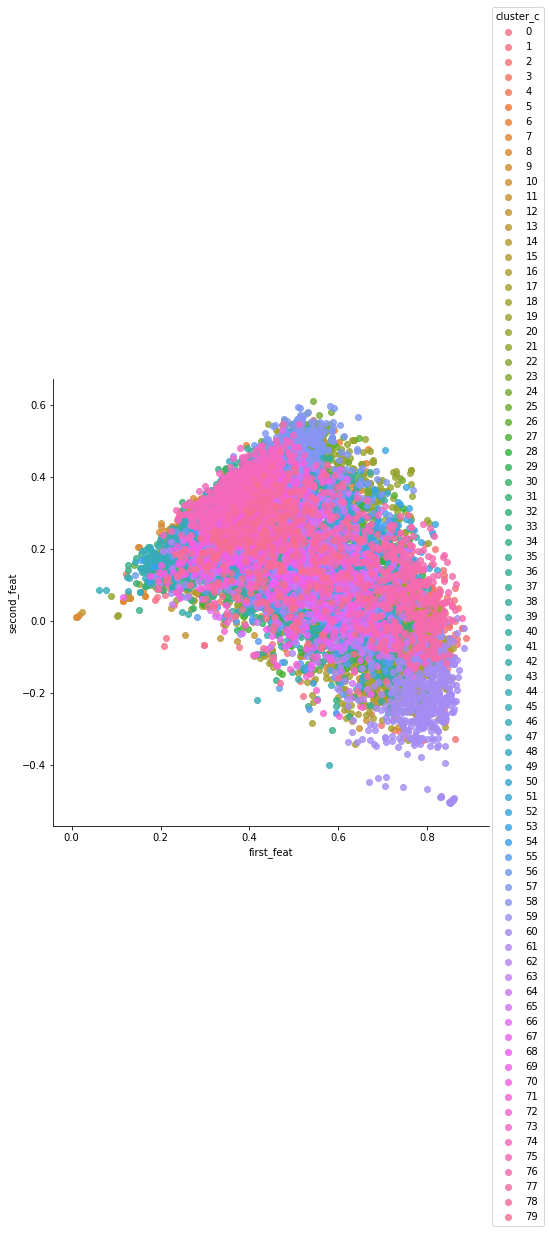

In [63]:
df = pd.DataFrame(dtm_lsa[:,0:2], columns = ['first_feat', 'second_feat'])
df['cluster_c'] = predicted_cluster

sns.lmplot(x = 'first_feat', y='second_feat', hue = 'cluster_c', data = df, fit_reg = False, size = 7)

In [65]:
original_space_centroids = lsa.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]

In [45]:
kmeans_model = open('kmeans.model', 'wb')
pickle.dump(km, file=kmeans_model)

In [67]:
cluster_num = 80

In [73]:
terms = vectorizer.get_feature_names()

In [74]:
for i in range(cluster_num):
    print("Cluster %d:" % i, end='')
    print(" ")
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind], end='')  # print words in clusters
        print("")
    print(" ")
    print(" ")
print()

Cluster 0: 
 2017
 twitter
 pic
 pic twitter
 police
 20
 trump
 january
 20 2017
 january 20
 january 20 2017
 pm
 news
 june
 people
 one
 update
 also
 https
 we
 
 
Cluster 1: 
 trump
 said
 people
 president
 police
 one
 it
 washington
 march
 in
 we
 donald
 rights
 donald trump
 women
 also
 new
 day
 city
 first
 
 
Cluster 2: 
 trump
 said
 president
 he
 it
 would
 people
 house
 campaign
 we
 one
 also
 that
 russia
 donald
 white
 but
 us
 donald trump
 white house
 
 
Cluster 3: 
 tillerson
 trump
 state
 said
 russia
 foreign
 secretary
 department
 administration
 would
 president
 policy
 also
 it
 senate
 us
 he
 sanctions
 exxon
 secretary state
 
 
Cluster 4: 
 russia
 russian
 said
 it
 putin
 in
 moscow
 officials
 also
 one
 government
 us
 would
 president
 news
 people
 last
 state
 united
 mr
 
 
Cluster 5: 
 it
 one
 would
 people
 in
 but
 we
 time
 us
 she
 he
 years
 they
 said
 two
 and
 could
 first
 even
 many
 
 
Cluster 6: 
 people
 said
 it
 one
 pol

 security
 election
 would
 report
 community
 agencies
 fbi
 also
 intelligence community
 
 
Cluster 66: 
 clinton
 trump
 said
 campaign
 election
 it
 hillary
 comey
 president
 would
 in
 hillary clinton
 democratic
 one
 she
 but
 state
 email
 democrats
 people
 
 
Cluster 67: 
 said
 united
 states
 united states
 trump
 american
 would
 one
 two
 it
 government
 security
 people
 in
 country
 could
 president
 officials
 also
 last
 
 
Cluster 68: 
 said
 percent
 last
 year
 million
 world
 bank
 oil
 trump
 since
 000
 would
 companies
 week
 billion
 jobs
 company
 according
 market
 years
 
 
Cluster 69: 
 said
 syria
 syrian
 government
 military
 forces
 state
 russia
 islamic
 assad
 turkey
 islamic state
 united
 would
 russian
 isis
 iraq
 states
 also
 united states
 
 
Cluster 70: 
 said
 police
 court
 he
 told
 case
 two
 in
 state
 also
 one
 years
 it
 law
 according
 time
 would
 last
 attorney
 death
 
 
Cluster 71: 
 trump
 said
 order
 president
 executive
 

In [18]:
#kmodel = pickle.load(open('kmeans.model','rb'))

In [17]:
#see how the kmeans clustered documents together based on the dtm_lsa fit/transform.
label = km.labels_

In [7]:
#df_police_russia = pd.read_pickle('df_pol_rus.pkl')

In [48]:
df_police_russia.to_pickle('df_pol_rus.pkl')

In [33]:
len(df_police_russia)

14064

In [18]:
df_police_russia['label'] = label

In [19]:
df_police_russia['label'].value_counts()

60    476
16    412
9     378
76    370
74    327
28    311
17    311
48    301
2     281
24    273
57    250
30    249
33    247
18    246
65    243
20    237
45    234
36    232
11    232
38    224
27    212
31    211
4     210
44    198
55    197
70    195
51    189
25    189
10    188
75    179
     ... 
26    139
79    137
7     135
58    132
63    131
67    130
35    128
32    119
39    117
61    115
56    114
15    114
54    112
13    111
66    108
43    106
68    105
37    104
3     102
14     96
71     91
59     89
46     88
34     87
50     81
40     76
78     67
0      64
23     51
47     41
Name: label, Length: 80, dtype: int64

In [56]:
#bottom to top
#47 = bill cosby
#23 = women? not clear
#0 = innauguration, protest, milo
#78 = Gorsuch
#40 = middle east, arms, nuclear
#50 = immigrants,sessions, hate crime
#34 = jeff sessions
#46 = north korea
#59 = china, south china sea, korea
#71 = refugees, travel ban
#14 = turkey
#3 = tillerson
#37 = international womens day, womens march, protest
#68 = oil, economy, wall street
#43 = summaries, daily digests?
#66 = hillary clinton, email
#13 = sessions, resign, fired
#54 = rape, gay, religion, assault
#15 = brexit, england, election
#56 = racism, black
#61 = middle east, air force, syria 
#39 = obama
#32 = nato g7 
#35 = us states (arkansas, maine, new jersey) 67 63

#top to bottom
#60 = trump, presidency, criticism
#16 = comey, special investigation, fbi
#9 = death, shooting, violence
#76 = no idea 
#74 = flights, sex, sexism, all over the place
#28 = trump, kushner, ivanka, duerte 
#17 = more trump! russia, flynn 
#48 = disasters, floods, fires, protest

df_police_russia[df_police_russia['label'] ==48]

,_id,author,content,date,id,month,publication,title,url,year,text_clean,text_clean_stem,sentences,sent_length,words,word_pos,label
61,5b0329e49959af5ca4022a83,Ben Hubbard,"BEIRUT, Lebanon — For millions of Damascus ...",2017-01-05,17358,1.0,New York Times,A New Casualty of Syria’s War: Drinking Water ...,None,2017.0,"BEIRUT, Lebanon — For millions Damascus reside...","beirut, lebanon — for millions damascus reside...","[beirut, lebanon — for millions damascus resid...",45,"[beirut, ,, lebanon, —, for, millions, damascu...","[(beirut, NN), (,, ,), (lebanon, NN), (—, NN),...",48
618,5b0329e49959af5ca4022cb0,Roni Caryn Rabin,Rosanne Bloom and her family had just settled ...,2017-01-31,17981,1.0,New York Times,Travelers With Nut Allergies Clash With Airlin...,None,2017.0,Rosanne Bloom family settled seats flight Phil...,rosanne bloom family settled seats flight phil...,[rosanne bloom family settled seats flight phi...,66,"[rosanne, bloom, family, settled, seats, fligh...","[(rosanne, NN), (bloom, NN), (family, NN), (se...",48
1171,5b0329e49959af5ca4022ed9,Tanya Mohn,"Andy Hicks, owner of HIX Inc. a small health c...",2017-02-14,18613,2.0,New York Times,How to Plan a Safe Trip for Gay and Transgende...,None,2017.0,"Andy Hicks, owner HIX Inc. small health care t...","andy hicks, owner hix inc. small health care t...","[andy hicks, owner hix inc. small health care ...",62,"[andy, hicks, ,, owner, hix, inc., small, heal...","[(andy, NN), (hicks, NNS), (,, ,), (owner, NN)...",48
1223,5b0329e49959af5ca4022f0d,Thomas Erdbrink,"IMAM KHOMEINI AIRPORT, Iran — When the Unit...",2017-02-19,18669,2.0,New York Times,U.S. Wrestlers Find They Have Passionate Fans ...,None,2017.0,"IMAM KHOMEINI AIRPORT, Iran — When United Stat...","imam khomeini airport, iran — when united stat...","[imam khomeini airport, iran — when united sta...",33,"[imam, khomeini, airport, ,, iran, —, when, un...","[(imam, NN), (khomeini, NN), (airport, NN), (,...",48
1812,5b0329e49959af5ca402315a,Christine Hauser,A black and white photograph shows Adolf Hitle...,2017-03-16,19312,3.0,New York Times,"Candid Hitler Photos Sell for $41,000 to Unide...",None,2017.0,A black white photograph shows Adolf Hitler re...,a black white photograph shows adolf hitler re...,[a black white photograph shows adolf hitler r...,33,"[a, black, white, photograph, shows, adolf, hi...","[(a, DT), (black, JJ), (white, JJ), (photograp...",48
1844,5b0329e49959af5ca402317a,Michael R. Gordon and Hwaida Saad,WASHINGTON — The Pentagon released an aeria...,2017-03-19,19350,3.0,New York Times,Pentagon Releases Photo to Rebut Contention It...,None,2017.0,WASHINGTON — The Pentagon released aerial phot...,washington — the pentagon released aerial phot...,[washington — the pentagon released aerial pho...,32,"[washington, —, the, pentagon, released, aeria...","[(washington, NN), (—, VBZ), (the, DT), (penta...",48
1974,5b0329e49959af5ca40231fc,Henry Fountain,After a season that saw temperatures soar at t...,2017-03-23,19506,3.0,New York Times,Arctic’s Winter Sea Ice Drops to Its Lowest Re...,None,2017.0,"After season saw temperatures soar North Pole,...","after season saw temperatures soar north pole,...",[after season saw temperatures soar north pole...,20,"[after, season, saw, temperatures, soar, north...","[(after, IN), (season, NN), (saw, VBD), (tempe...",48
2664,5b0329e59959af5ca40237da,Rebecca R. Ruiz,RIO DE JANEIRO — Most of the key figures in...,2017-01-23,21143,1.0,New York Times,"Doping Sample Bottles, No Longer Seen as Tampe...",None,2017.0,RIO DE JANEIRO — Most key figures involved Rus...,rio de janeiro — most key figures involved rus...,[rio de janeiro — most key figures involved ru...,42,"[rio, de, janeiro, —, most, key, figures, invo...","[(rio, NN), (de, IN), (janeiro, FW), (—, FW), ...",48
3100,5b0329e59959af5ca4023c9f,Isabel Kershner,JERUSALEM — Parts of the port city of Haifa...,2017-04-07,22498,4.0,New York Times,"As Wildfires Rage, Israel Suggests Arson and A...",None,2017.0,JERUSALEM — Parts

In [117]:
#lsa.inverse_transform(km.cluster_centers_).argsort()[:,::-1]

In [116]:
#df_nyt.iloc[2]

In [114]:
#df_nyt['content'].head(3)

In [115]:
#df_nyt['content'].tail(3)

In [31]:
#df_nyt.iloc[1].content

In [32]:
#df_nyt.iloc[4168].content

In [59]:
dtm.shape

(4171, 20000)

In [71]:
np.asmatrix(dtm_lsa)

matrix([[ 0.64314579,  0.30383458, -0.21701287, ..., -0.03975713,
         -0.03015024,  0.01317419],
        [ 0.82537203, -0.07377176, -0.30755553, ...,  0.04264852,
         -0.04017843, -0.01421209],
        [ 0.61018475,  0.51653999,  0.06552706, ...,  0.05630591,
          0.03607694,  0.01715899],
        ...,
        [ 0.73240124, -0.2824972 , -0.32225336, ..., -0.00300382,
          0.02816028, -0.00393615],
        [ 0.67656222,  0.5773697 , -0.00747298, ..., -0.02065208,
         -0.08124556,  0.03349854],
        [ 0.77273447, -0.145474  , -0.131412  , ..., -0.01521824,
          0.05392152,  0.05748961]])

### End of SVD exploration

### play with trump_df dataset

In [23]:
df_trump_bre_nyt = pd.concat([df_trump_breit, df_trump_nyt])

In [60]:
#train = df_trump_bre_nyt.sample(frac=0.8, random_state=42)

In [61]:
#test = df_trump_bre_nyt.drop(train.index)

In [68]:
n_components = 100

In [52]:
tf_vectorizer = CountVectorizer(max_df=0.98, min_df=2,
                                ngram_range=(1,3),
                                max_features=20000)
tf_vectorizer2 = CountVectorizer(max_df=0.98, min_df=2,
                                ngram_range=(1,3),
                                max_features=20000)
tf_vectorizer_join = CountVectorizer(max_df=0.98, min_df=2,
                                ngram_range=(1,3),
                                max_features=20000)

In [38]:
tf_nyt = tf_vectorizer.fit_transform(df_trump_nyt['text_clean_stem'])
tf_bre = tf_vectorizer2.fit_transform(df_trump_breit['text_clean_stem'])
tf_join = tf_vectorizer_join.fit_transform(df_trump_bre_nyt['text_clean_stem'])

In [63]:
tf_join = tf_vectorizer_join.fit_transform(train['text_clean_stem'])

In [101]:
tf_test = tf_vectorizer_join.transform(test['text_clean_stem'])

In [102]:
tf_test

<1201x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 382091 stored elements in Compressed Sparse Row format>

In [69]:
lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda2 = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_join = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [40]:
lda.fit(tf_nyt)
lda2.fit(tf_bre)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=25, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [70]:
lda_join.fit(tf_join)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=100, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [105]:
lda_test = lda_join.transform(tf_test)

In [41]:
vocab = tf_vectorizer.get_feature_names()
vocab2 = tf_vectorizer2.get_feature_names()

In [72]:
voc_join = tf_vectorizer_join.get_feature_names()

In [75]:
for topic in range(n_components):
    print(f"TOPIC {topic}")
    for j in np.argsort(-lda_join.components_,1)[topic,:10]:
        print(vocab[j])
    print()

TOPIC 0
see way
nerves
however trump
white house trump
never thought
advice
white house staff
official spoke
only
footprint

TOPIC 1
helped
however trump
result
bitter
castle
resource
denmark
old
said dr
would cover

TOPIC 2
said going
house speaker
prolonged
nonwhite
performances
portugal
opposed
promise repeal
estates
president xi jinping

TOPIC 3
gov
patrons
performances
portugal
that great
donor
yearlong
said going
nonwhite
business executives

TOPIC 4
president xi jinping
commissions
john lewis
modernize
paris
elephant
would cover
2019
calm
forms

TOPIC 5
said going
powell
insurers
last weeks
green
meute
federal election commission
airliner
company chief
resembles

TOPIC 6
hostilities
law order
backing
background checks
according one
strategic international
assaulting
fines
sphere
government would

TOPIC 7
phone call
wales
closest advisers
knowing
potential conflicts interest
elephant
doom
donor
2019
20 million people

TOPIC 8
to
november 2015
el
eggs
basket
said going
nonwhite
wo

said going
president xi jinping
white house staff
performances
president george
improper
activity
united states south
united states policy
official spoke

TOPIC 68
taxi
gun control
ineffective
paul
tayyip
trump last year
rubio florida
unhappy
relations united states
ratings

TOPIC 69
nonwhite
said going
friday morning
would cover
metric
labs
shutdown
meticulous
25
fiscal

TOPIC 70
trump staff
franchise
tackling
unfit
tend
screen
compelled
sadie
yellen
local governments

TOPIC 71
president xi jinping
deadline
worlds
waterfront
law would
adjustment tax
nomination judge neil
worked
ascension
pumped

TOPIC 72
said going
president xi jinping
worth billion
scattered
performances
spoke telephone
united states policy
hosting
would cover
states election

TOPIC 73
nonwhite
campaign trail
midterm
brink
poultry
british government
2014 2015
kaine virginia
kaiser
stole

TOPIC 74
worked
md
polite
pay wall
political
access pipeline
gearing
loomed
room
workers rights

TOPIC 75
united states senate
said

In [46]:
for topic in range(n_components):
    print(f"TOPIC {topic}")
    for j in np.argsort(-lda.components_,1)[topic,:10]:
        print(vocab[j])
    print()

TOPIC 0
said
ethics
would
intelligence
one
clinton
campaign
republican
office
president
year
officials
republicans
house
news

TOPIC 1
said
one
president
would
the
intelligence
news
york
san
also
times
it
last
russian
could

TOPIC 2
health
would
care
republicans
tax
said
republican
law
house
people
bill
insurance
health care
act
democrats

TOPIC 3
bharara
said
state
cuomo
would
house
obama
clayton
one
york
president
news
first
american
it

TOPIC 4
carbon capture
capture
carbon
co2
steam
sheldon whitehouse
whitehouse
said aware
sheldon
said
nominees
guccifer
romanian
news
russian

TOPIC 5
said
would
russian
one
committee
people
russia
states
president
government
political
intelligence
it
could
officials

TOPIC 6
said
republicans
house
obama
would
year
president
people
it
one
political
american
could
care
united

TOPIC 7
_____
north
korea
north korea
briefing
here
south
nuclear
president
missile
china
kushner
korean
south korea
times

TOPIC 8
said
president
campaign
house
clinton
white
w

In [47]:
for topic in range(n_components):
    print(f"TOPIC {topic}")
    for j in np.argsort(-lda2.components_,1)[topic,:10]:
        print(vocab2[j])
    print()

TOPIC 0
clinton
hillary
hillary clinton
twitter
follow
stated
ian
maher
twitter ianhanchett
follow ian
hanchett twitter
hanchett twitter ianhanchett
ian hanchett twitter
follow ian hanchett
ianhanchett

TOPIC 1
israel
jerusalem
jewish
president
klein
embassy
palestinian
radio
aaron
israeli
aaron klein
investigative
state
said
peace

TOPIC 2
said
president
people
that
think
donald
donald trump
we
house
one
going
it
would
re
news

TOPIC 3
obamacare
health
bill
care
women
health care
planned
parenthood
planned parenthood
insurance
march
repeal
abortion
healthcare
senate

TOPIC 4
rouhani
full story
tehran
story here
read full story
read full
guards
iranians
said saturday
hassan
story
reuters
quoted
reuters reports
quoted saying

TOPIC 5
milo
breitbart
berkeley
university
students
police
speech
campus
violence
news
gun
event
free speech
breitbart news
uc

TOPIC 6
jackie
mason
noaa
temperature
bates
above follow
above follow daniel
countries middle
countries middle east
nasa
said
2017
pruitt

In [272]:
#lda.perplexity(tf_nyt), lda2.perplexity(tf_bre)

In [74]:
lda_join.perplexity(tf_join)

4508.012430449808

### Being exploration using LDA

In [42]:
n_components = 25

In [43]:
tf_vectorizer = CountVectorizer(max_df=0.98, min_df=2,
                                ngram_range=(1,3),
                                max_features=20000)

In [44]:
tf = tf_vectorizer.fit_transform(df_nyt['text_clean_stem'])

In [45]:
lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [46]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=25, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [47]:
vocab = tf_vectorizer.get_feature_names()

In [49]:
for topic in range(n_components):
    print(f"TOPIC {topic}")
    for j in np.argsort(lda.components_,1)[topic,:15]:
        print(vocab[j])
    print()

TOPIC 0
white supremacy
kaepernick
conference thursday
one eight
published last
feeding
said last month
disabled
patients
youngstown
we wanted
ventures
disconnected
counterterrorism
paralyzed

TOPIC 1
taxable
pitt
metropoulos
financial protection
lupone
crockett
male female
border adjustment tax
pimco
apple music
bracket
dr gottlieb
bourne
fink
ledecky

TOPIC 2
lawyer said
firestorm
militias
least 20
would much
friday said
white house staff
hijab
subsidized
education department
macau
benefiting
bharara
lure
cartel

TOPIC 3
administration official
exclusion
jonas
2008 financial
poles
way around
weathered
deutsche bank
issuing
beyond that
saying we
must also
accumulated
judaism
you need

TOPIC 4
bridgewater
pine
aesthetic
late 1960s
destabilizing
smartphone
gruesome
nawaz
secretaries
wholesale
premises
much easier
homage
super bowl
going come

TOPIC 5
fame
automaker
st petersburg
satire
including york
people believe
emmanuel
sarin
sentiments
awards
ghost
tax policy
buffy
propelled
cotton

In [50]:
lda.perplexity(tf)

4923.520905296811

In [51]:
n_components = 10

In [52]:
tf_vectorizer = CountVectorizer(max_df=0.98, min_df=2,
                                ngram_range=(1,3),
                                max_features=20000)

In [53]:
tf = tf_vectorizer.fit_transform(df_nyt['text_clean_stem'])

In [54]:
lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [55]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [56]:
vocab = tf_vectorizer.get_feature_names()

In [57]:
for topic in range(n_components):
    print(f"TOPIC {topic}")
    for j in np.argsort(lda.components_,1)[topic,:10]:
        print(vocab[j])
    print()

TOPIC 0
kaepernick
white supremacy
salesforce
oakley
sandra
missoula
thomson
hard find
lore
instructors

TOPIC 1
border adjustment tax
stumpf
pimco
unilever
financial protection
taxable
today goes
kidney fund
publicly traded
dr gottlieb

TOPIC 2
lawyer said
bharara
white house staff
financial protection
government ethics
guo
al bab
kuwait
stem cells
thae

TOPIC 3
jonas
2008 financial
deutsche bank
beyond that
poles
weathered
coming years
liquor
10 billion
make life

TOPIC 4
destabilizing
nawaz
sotheby
polanski
antimissile
tanaka
prime minister shinzo
super bowl
adviser michael flynn
tax rate

TOPIC 5
buffy
nerve agent
satire
sarin
guggenheim
merchants
lochte
ferrante
anwar
summer games

TOPIC 6
abdel rahman
officer shelby
prescott
khan sheikhoun
apple music
kyi
coral
kaaba
general townsend
bella

TOPIC 7
former president bill
murkowski
judge garland
general mcmaster
seely
knife attack
segarra
robart
house freedom caucus
sheikhoun

TOPIC 8
pga tour
pilgrimage
raúl
lavrov
scully
rejects


In [58]:
lda.perplexity(tf)

4977.283826180294

In [212]:
# porter = PorterStemmer()
# wnl = WordNetLemmatizer() 



In [213]:
# def tokenizer(text):
 
#     tokens_ = [word_tokenize(sent) for sent in sent_tokenize(text)]
 
#     tokens = []
#     for token_by_sent in tokens_:
#         tokens += token_by_sent
 
#     tokens = list(filter(lambda t: t.lower() not in stop, tokens))
#     tokens = list(filter(lambda t: t not in punctuation, tokens))
#     tokens = list(filter(lambda t: t not in [u"'s", u"n't", u"...", u"''", u'``', u'\u2014', u'\u2026', u'\u2013'], tokens))
     
#     filtered_tokens = []
#     for token in tokens:
#         token = wnl.lemmatize(token)
#         if re.search('[a-zA-Z]', token):
#             filtered_tokens.append(token)
 
#     filtered_tokens = list(map(lambda token: token.lower(), filtered_tokens))
 
#     return filtered_tokens

In [214]:
# def get_keywords(tokens, num):
#     return Counter(tokens).most_common(num)

In [9]:
# articles = []
# for index, row in df_2.iterrows():
#     try:
#         data = row['content'].strip().replace("'","")
#         data = data.encode('ascii', 'ignore').decode('ascii')
#         document = tokenizer(data)
#         top_5 = get_keywords(document,5)
#         unzipped = list(zip(*top_5))
#         kw = list(unzipped[0])
#         kw = ",".join(str(x) for x in kw)
#         articles.append((kw,row['title']))
#     except Exception as e:
#         print(e)
#         pass

## Beginning of TF_IDF section

In [232]:
rows = list()
for row in df_2[['title', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.title, word))
words_df = pd.DataFrame(rows,columns=['title','word'])

In [233]:
words_df.head(10)

,title,word
0,Rift Between Officers and Residents as Killing...,After
1,Rift Between Officers and Residents as Killing...,the
2,Rift Between Officers and Residents as Killing...,bullet
3,Rift Between Officers and Residents as Killing...,shells
4,Rift Between Officers and Residents as Killing...,get
5,Rift Between Officers and Residents as Killing...,counted
6,Rift Between Officers and Residents as Killing...,","
7,Rift Between Officers and Residents as Killing...,the
8,Rift Between Officers and Residents as Killing...,blood
9,Rift Between Officers and Residents as Killing...,dries


In [239]:
#delete punctuation and all 1 letter words (a, I)
words_df = words_df[words_df.word.str.len()>1]

In [241]:
words_df['word'] = words_df.word.str.lower()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [243]:
counts = words_df.groupby('title').word.value_counts().to_frame().rename(columns={'word':'num_word'})

In [250]:
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'num_word': 'n_d'})

In [251]:
word_sum.head()

,n_d
title,
\n\n,521
,15706
"""13 Reasons Why"" Is Officially Coming Back For A Second Season",148
"""Administration-Related Changes"" Lead To Delay In A Key Transgender Rights Case",322
"""Billions"" Is A Lot Harder To Watch Than It Was Last Year",942


In [255]:
tf = counts.join(word_sum)

tf['tf'] = tf.num_word/tf.n_d

In [256]:
tf.head()

num_word  n_d        tf
title word                           
\n\n  for           43  521  0.082534
      whole         36  521  0.069098
      foods         35  521  0.067179
      ounces        35  521  0.067179
      joe           33  521  0.063340

In [258]:
c_d = words_df.title.nunique()

In [262]:
idf = words_df.groupby('word').title.nunique().to_frame().rename(columns={'title':'i_d'}).sort_values('i_d')

In [264]:
idf['idf'] = np.log(c_d/idf.i_d.values)

In [265]:
idf.head()

,i_d,idf
word,,
ladr,1,10.825621
marcetic,1,10.825621
marcellina,1,10.825621
marcellin,1,10.825621
marcelinho,1,10.825621


In [266]:
tf_idf = tf.join(idf)

In [267]:
tf_idf.head()

num_word  n_d        tf    i_d       idf
title word                                            
\n\n  for           43  521  0.082534  47538  0.056337
      whole         36  521  0.069098   4804  2.348417
      foods         35  521  0.067179    537  4.539623
      ounces        35  521  0.067179     61  6.714747
      joe           33  521  0.063340   1683  3.397288

In [268]:
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf

In [288]:
tf_idf.nlargest(50, 'tf_idf')

,,num_word,n_d,tf,i_d,idf,tf_idf
title,word,,,,,,
"Charlie Murphy, Comedian &amp Brother of Eddie, Dies at 57 - Breitbart",advertisement,1,1,1.000000,198,5.537354,5.537354
Police: Chicago Torture Victim’s Parents Received Taunting Messages - Breitbart,advertisement,1,1,1.000000,198,5.537354,5.537354
Egypt Looks for an Expanded Role in America’s Foreign Policy,cairo,1,1,1.000000,397,4.841685,4.841685
The dark history at the heart of the French electionâ€‚,paris,1,1,1.000000,1922,3.264500,3.264500
Performing at Trump’s inauguration is causing a rift in the Mormon Tabernacle Choir,utah,1,3,0.333333,578,4.466047,1.488682
Recovering heroin addict explains why so many people fail out of rehab after a few days,andi,1,6,0.166667,11,8.427726,1.404621
Rhode Island’s ’sassy’ Teacher of the Year posed next to Trump with a black lace fan — and Trump loved it,giannopoulos,1,7,0.142857,3,9.727009,1.389573
See the terrifying amount of sugar that’s in 16 popular beverages,grams,16,82,0.195122,62,6.698487,1.307022
Rhode Island’s ’sassy’ Teacher of the Year posed next to Trump with a black lace fan — and Trump loved it,nikos,1,7,0.142857,10,8.523036,1.217577


In [240]:
words_df.word.value_counts()

the                  1985330
to                   1079522
of                    970974
and                   872453
in                    699776
that                  517298
is                    347501
for                   347206
on                    328169
was                   265957
with                  257261
it                    254860
The                   252445
said                  222137
as                    219331
he                    216742
his                   187524
Trump                 179487
by                    175654
at                    175096
have                  175041
be                    173626
from                  170251
not                   164358
are                   159839
has                   158613
an                    148664
who                   133145
they                  125985
this                  118228
                      ...   
Sueann                     1
CHICKEN                    1
Polarstern                 1
Alleluia      